# Hello OpenScPCA

Joshua A. Shapiro, Childhood Cancer Data Lab, ALSF

2024-03-19


## Introduction

This notebook presents a simple example of an analysis in the OpenScPCA project, using the Python `anndata` module.

We will go through the processed AnnData objects in the `data` directory and count the number of cells in each object, plotting the results.


## Setup

Load modules and set initial paths.


In [1]:
# import required modules
import pathlib

import anndata
import git
import pandas as pd
import session_info

Set the paths to the data, results, and plots directories.
Here we use the [`gitpython` module](https://gitpython.readthedocs.io/en/stable/reference.html#git.repo.base.Repo.working_tree_dir) to find the root of the `OpenScPCA-analysis` repository by looking for the (hidden) `.git` directory.
Then we define the module, input data, and results directories relative to that root.

(You might note that the module directory is the same as this file's location, but the method here works even if we move this notebook to a different location in the repository.)


In [2]:
# Find the repository root directory
repo_root = pathlib.Path(git.Repo(".", search_parent_directories=True).working_dir)

# set module path (using pathlib)
module_root = repo_root / "analyses" / "hello-python"

# set current data directory
data_dir = repo_root / "data" / "current"

# set results and plots directories (using the analysis project file to find root)
results_dir = module_root / "results"
plots_dir = module_root / "plots"

We will be creating two output files: a table and a plot.
Defining their locations in the `Setup` section will make it easy for future users (including us in the future) to know what to expect as output from this notebook.


In [3]:
count_file = results_dir / "cell_counts.csv"
plot_file = plots_dir / "cell_counts.pdf"

## Functions

First, we will define a function to load and count the cells in an AnnData file, returning a project ID, sample ID, library ID, and number of cells.


In [4]:
def count_anndata(anndata_file: pathlib.Path | str) -> tuple[str, str, str, int]:
    """
    Count the number of cells in an anndata file.
    Returns a tuple with the Project ID, Sample ID, Library ID, and the number of cells.
    """
    anndata_obj = anndata.read_h5ad(anndata_file)

    return (
        anndata_obj.uns["project_id"],
        anndata_obj.uns["sample_id"],
        anndata_obj.uns["library_id"],
        anndata_obj.n_obs,
    )

## Count cells and plot


In [5]:
# get all processed RNA anndata files in the data directory
anndata_files = data_dir.glob("**/*_processed_rna.hdf5")

# apply our counting function to all of the files and create a data frame of the results
count_tuples = (count_anndata(file) for file in anndata_files)
cell_counts = pd.DataFrame(
    count_tuples, columns=["project_id", "sample_id", "library_id", "n_cells"]
)

Let's look at the table of results (or the start of it) to see what we have.


In [6]:
# print the first 10 rows of the data frame
cell_counts.head(10)

,project_id,sample_id,library_id,n_cells
0,SCPCP000007,SCPCS000224,SCPCL000298,5285
1,SCPCP000007,SCPCS000223,SCPCL000297,4029
2,SCPCP000007,SCPCS000241,SCPCL000359,10556
3,SCPCP000007,SCPCS000222,SCPCL000296,3548
4,SCPCP000007,SCPCS000225,SCPCL000299,1649
5,SCPCP000007,SCPCS000240,SCPCL000363,7981
6,SCPCP000007,SCPCS000236,SCPCL000353,6320
7,SCPCP000007,SCPCS000231,SCPCL000371,3190
8,SCPCP000007,SCPCS000238,SCPCL000357,5902
9,SCPCP000007,SCPCS000239,SCPCL000361,3630


And now save it to the output file we defined earlier


In [7]:
cell_counts.to_csv(count_file, index=False)

Finally, we will plot these results as a faceted histogram, colored by project ID.


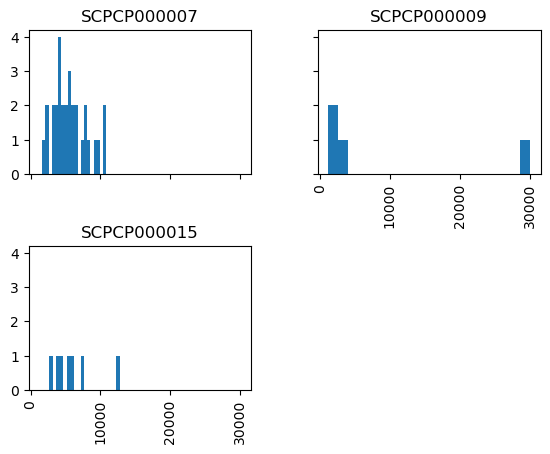

In [8]:
count_plot = cell_counts.hist(
    column="n_cells", by="project_id", bins=20, sharex=True, sharey=True
)

Now let's save the plot.

In [9]:
# special case for one project (plot has no facets)
if cell_counts.project_id.nunique() == 1:
    fig = count_plot.figure
else:
    fig = count_plot.flat[0].figure
fig.savefig(plot_file)

## Session Info


In [10]:
session_info.show()